In [83]:
# Required Python Packages
import pandas as pd ### package for tabular data analysis
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split ### used to split the dataset into test and train
from sklearn.ensemble import RandomForestClassifier ### ML model
from sklearn.metrics import accuracy_score ### used to calculate the accuracy of the trained classifier
from sklearn.metrics import confusion_matrix ### ### used to understand the trained classifier behaviour over the test dataset or validate the dataset
import matplotlib.pyplot as plt
import numpy as np
import pdb

In [84]:
df= pd.read_csv('netmate_out.csv', sep = ',', header = None) 

df.columns =["srcip", #0
            "srcport", #1
            "dstip", #2
            "dstport", #3
            "proto", #4
            "total_fpackets", #5
            "total_fvolume", #6
            "total_bpackets", #7
            "total_bvolume", #8
            "min_fpktl", #9
            "mean_fpktl", #10
            "max_fpktl", #11
            "std_fpktl", #12
            "min_bpktl", #13
            "mean_bpktl", #14
            "max_bpktl", #15
            "std_bpktl", #16
            "min_fiat", #17
            "mean_fiat", #18
            "max_fiat", #19
            "std_fiat", #20
            "min_biat", #21
            "mean_biat", #22
            "max_biat", #23
            "std_biat", #24
            "duration", #25
            "min_active", #26
            "mean_active", #27
            "max_active", #28
            "std_active", #29
            "min_idle", #30
            "mean_idle", #31
            "max_idle", #32
            "std_idle", #33
            "sflow_fpackets", #34
            "sflow_fbytes", #35
            "sflow_bpackets", #36
            "sflow_bbytes", #37
            "fpsh_cnt", #38
            "bpsh_cnt", #39
            "furg_cnt", #40
            "burg_cnt", #41
            "total_fhlen", #42
            "total_bhlen", #43 ###44 flow statistics total
            "target_variable"] #44

interesting_features = df.loc[:, 
                           ['proto', #4 ==X0
                           'min_fpktl', #9 ==X1
                           'mean_fpktl', #10 ==X2
                           'max_fpktl', #11 ==X3
                           'std_fpktl', #12 ==X4
                           'min_bpktl', #13 ==X5
                           'mean_bpktl', #14 ==X6
                           'max_bpktl', #15 ==X7 
                           'std_bpktl', #16 ==X8
                           'min_fiat', #17 ==X9
                           'mean_fiat', #18 ==X10
                           'max_fiat', #19 ==X11
                           'std_fiat', #20 ==X12
                           'min_biat', #21 ==X13
                           'mean_biat', #22 ==X14
                           'max_biat', #23 ==X15
                           'std_biat', #24 ==X16
                           'target_variable']] #44 ==Y          

#print(interesting_features)

In [85]:
headers= list(interesting_features.columns.values)
#print(headers)

In [86]:
def split_dataset(dataset, train_percentage, feature_headers, target_header):
    """
    Split the dataset with train_percentage
    :param dataset:
    :param train_percentage:
    :param feature_headers:
    :param target_header:
    :return: train_x, test_x, train_y, test_y
    """

    # Split dataset into train and test dataset
    train_x, test_x, train_y, test_y = train_test_split(interesting_features[feature_headers], interesting_features[target_header],
                                                        train_size=train_percentage)
    return train_x, test_x, train_y, test_y


In [87]:
def random_forest_classifier(features, target):
    """
    To train the random forest classifier with features and target data
    :param features:
    :param target:
    :return: trained random forest classifier
    """
    clf = RandomForestClassifier()
    clf.fit(features, target)
    return clf

/Users/user1/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Train_x Shape ::  (227, 17)
Train_y Shape ::  (227,)
Test_x Shape ::  (98, 17)
Test_y Shape ::  (98,)
Trained model ::  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Actual outcome :: HTTP and Predicted outcome :: HTTP
Actual outcome :: OpenVPN and Predicted outcome :: OpenVPN
Actual outcome :: DNS and Predicted outcome :: DNS
Actual outcome :: DNS and Predicted outcome :: DNS
Actual outcome :: HTTP and Predicted outcome :: HTTP
Train Accuracy ::  1.0
Test Accuracy  ::  0.9897959183673469
Confusion matrix  [[43  0  0  0]
 [ 0 36  1  0]
 [ 0  0  2  0]
 [ 0  0  0 16]]


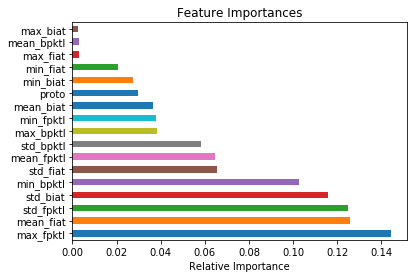

In [88]:
def main():
    """
    Main function
    :return:
    """
    ### Split the dataset
    train_x, test_x, train_y, test_y = split_dataset(interesting_features, 0.7, headers[0:-1], headers[-1])
 
    # Print the split dataset shape details
    print("Train_x Shape :: ", train_x.shape)
    print("Train_y Shape :: ", train_y.shape)
    print("Test_x Shape :: ", test_x.shape)
    print("Test_y Shape :: ", test_y.shape)
    
    # Create the random forest classifier
    trained_model = random_forest_classifier(train_x, train_y)
    print("Trained model :: ", trained_model)
    predictions = trained_model.predict(test_x)
    
    # Print the first 5 values of test_y and the preduct results target 
    for i in range(0, 5):
        print("Actual outcome :: {} and Predicted outcome :: {}".format(list(test_y)[i], predictions[i]))
    
    # Print the accuracy scores and confusion matrix
    print("Train Accuracy :: ", accuracy_score(train_y, trained_model.predict(train_x)))
    print("Test Accuracy  :: ", accuracy_score(test_y, predictions))
    print("Confusion matrix ", confusion_matrix(test_y, predictions))
    
    ### Produce plot to show the order of feature importance
    feat_importances = pd.Series(trained_model.feature_importances_, index=train_x.columns)
    feat_importances = feat_importances.nlargest(20)
    feat_importances.plot(kind='barh')
    plt.title('Feature Importances')
    plt.xlabel('Relative Importance')
    
if __name__ == "__main__":
    main()